# Features retrieval

## Instruments used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import pickle
from os import path, listdir
from essentia.standard import MonoLoader, OnsetDetection, FrameGenerator
from essentia.standard import Energy, ZeroCrossingRate
from essentia.standard import FFT, Centroid, Spectrum, CentralMoments, DistributionShape, Windowing, MFCC
from IPython.display import Audio
from ipywidgets import FloatProgress
from matplotlib.colors import ListedColormap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Theory used

### FFT
### Windowing
### Central Moments
### Centroid
### Variance, skewness and kurtosis
### MFCC

## The data

Let's separete two instruments from the training to see if we can use the stated features. First, we need to retrieve the waveforms from files and define the functions to extract features.

In [2]:
fr = 44100.0
list_of_inst = ['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio']
list_for_try = ['pia', 'vio', 'sax']

In [3]:
window = Windowing()
zcr = ZeroCrossingRate()
energy = Energy()
spectrum = Spectrum()
centroid = Centroid()
cm = CentralMoments()
dshape = DistributionShape()
mfcc = MFCC()

def get_features(audio, fr = 44100., fs = 0.2):
    frame = audio[:int(fr * fs)]
    spec = spectrum(window(frame))
    bands, coefs = mfcc(spec)
    res = [zcr(frame), energy(frame), centroid(spec)]
    res.extend(dshape(cm(spec)))
    res.extend(bands)
    res.extend(coefs)
    res.extend([bands.mean(), coefs.mean()])
    return res

In [4]:
with open('pia', 'r') as ftr:
    pia = pickle.load(ftr)

In [5]:
pia_features = []

for audio in pia:
    pia_features.append(get_features(audio))
    
pia = None
        
print np.asmatrix(pia_features)[:2]

[[  3.67346928e-02   1.39537781e+02   1.01996377e-01   2.22164020e-02
    2.26412487e+00   4.70937872e+00   6.41440274e-05   3.39300459e-04
    3.66164022e-05   1.78691320e-04   5.21262009e-05   1.77985057e-04
    1.67231497e-04   2.32947004e-05   4.75371962e-06   1.96225919e-05
    1.32241973e-03   3.10855139e-05   3.03104071e-06   7.86600322e-06
    4.73042337e-06   7.39312043e-07   2.75577404e-05   8.24861490e-06
    1.84996259e-06   2.25908457e-06   3.31204501e-06   3.60070817e-06
    5.41976988e-07   4.53440293e-07   2.27346027e-06   1.94536653e-07
    3.34070251e-07   5.25114842e-07   1.21411048e-07   1.99531883e-07
    1.67038934e-07   3.64491598e-07   1.45721216e-07   3.61145922e-08
    2.44022278e-08   5.34232640e-08   8.98985562e-08   2.25700383e-08
    2.70541243e-08   1.61883040e-08  -7.19403381e+02   1.52013306e+02
   -2.74266434e+00   1.22534027e+01  -3.40792847e+00   6.30607605e-01
   -7.62987709e+00   2.10877800e+00   8.49917603e+00   3.03588867e-01
   -7.24161148e+00  

In [6]:
with open('vio', 'r') as ftr:
    vio = pickle.load(ftr)

In [7]:
vio_features = []

for audio in vio:
    vio_features.append(get_features(audio))
    
vio = None
        
print np.asmatrix(vio_features)[:2]

[[  6.80272132e-02   3.67446175e+01   1.02370612e-01   1.55393668e-02
    2.17028069e+00   5.09216976e+00   6.83360486e-05   9.47145381e-05
    3.09154821e-05   5.54077633e-05   4.53565845e-05   1.91890122e-05
    5.50221303e-05   1.42810124e-04   1.84211476e-05   3.00240772e-05
    6.43433123e-06   3.40180741e-05   1.11779809e-04   1.76710600e-05
    5.66370727e-05   1.77477832e-05   1.78727169e-05   1.93120036e-06
    9.14047359e-06   1.53095480e-05   2.35608763e-06   2.80878726e-06
    4.99656744e-06   9.65585855e-07   5.56440057e-07   9.33598528e-07
    8.81321569e-07   1.36100687e-06   3.26442716e-07   2.93193210e-07
    1.73043077e-07   1.33428145e-07   7.62332775e-08   7.13578103e-08
    7.73943327e-08   5.16874294e-08   2.58938133e-08   3.65482968e-08
    2.58559769e-08   1.48632706e-08  -7.06812866e+02   1.44263458e+02
   -2.98353500e+01   3.97585678e+00  -4.09368324e+00   7.21924019e+00
    4.79095840e+00   2.03929901e-01  -2.85302162e+00  -7.52529144e-01
   -4.56877899e+00  

In [8]:
with open('flu', 'r') as ftr:
    flu = pickle.load(ftr)

In [9]:
flu_features = []

for audio in flu:
    flu_features.append(get_features(audio))
    
flu = None
        
print np.asmatrix(flu_features)[:2]

[[  3.28798182e-02   3.03300309e+00   9.71856564e-02   2.27274429e-02
    2.64893007e+00   7.35505390e+00   4.20881499e-08   5.37510141e-06
    1.56417241e-06   3.00590250e-06   3.24383927e-06   6.93795891e-06
    7.41120266e-06   8.61532044e-06   8.49413573e-06   1.11645240e-05
    1.54180828e-08   4.17824424e-08   1.75600064e-07   7.88007082e-09
    7.06542380e-08   6.81739536e-08   4.36033574e-08   1.58261759e-09
    4.67295166e-07   3.48219800e-07   2.46118881e-09   1.56929580e-09
    1.62392522e-09   6.61403590e-08   1.25737039e-08   1.35471181e-08
    2.71276135e-09   2.95311220e-09   1.30958588e-09   7.51002205e-10
    1.89044158e-09   2.74730727e-09   3.98722166e-09   7.07736048e-09
    8.33528246e-10   2.15161833e-10   3.58240271e-10   3.14677479e-10
    2.10222645e-10   1.25272417e-10  -9.49061523e+02   1.49082214e+02
    2.88470192e+01   7.85902786e+00  -1.22613029e+01  -2.43192749e+01
   -3.61717987e+01  -2.01102753e+01  -1.43480225e+01   1.05668049e+01
    1.69324074e+01  

In [10]:
with open('tru', 'r') as ftr:
    tru = pickle.load(ftr)

In [11]:
tru_features = []

for audio in tru:
    tru_features.append(get_features(audio))
    
tru = None
        
print np.asmatrix(tru_features)[:2]

[[  3.39002274e-02   2.54029846e+01   4.59482186e-02   2.00335612e-03
    4.20651722e+00   4.29204140e+01   2.82263736e-05   7.10841559e-05
    3.58652346e-06   5.57591375e-05   4.20264805e-05   2.17958786e-05
    1.15826158e-04   4.62992684e-05   1.51494905e-05   2.51252604e-05
    7.25936843e-06   8.17300133e-06   1.56254100e-05   8.11701375e-06
    1.21700341e-05   3.15609509e-06   3.72752379e-06   3.53633550e-06
    2.85018473e-06   1.08813549e-06   4.68586393e-07   1.18051979e-07
    6.28574313e-08   3.01224645e-08   1.79312902e-08   1.22544463e-08
    1.13401599e-08   4.20392521e-09   2.28708696e-09   8.40863323e-10
    4.12209489e-10   2.63657124e-10   7.43237277e-11   2.95873881e-11
    9.57041946e-11   3.65102421e-10   2.49857635e-10   1.53946387e-11
    2.09825579e-13   5.70131846e-14  -8.40067871e+02   2.31326172e+02
   -1.99017982e+01  -3.16937332e+01   1.36537323e+01  -3.18901062e-01
   -7.35036469e+00  -8.81349182e+00  -4.60728455e+00   6.29241371e+00
    2.71492004e-02  

In [12]:
with open('gac', 'r') as ftr:
    gac = pickle.load(ftr)

In [13]:
gac_features = []

for audio in gac:
    gac_features.append(get_features(audio))
    
gac = None
        
print np.asmatrix(gac_features)[:2]

[[  1.60997733e-02   4.42008240e+02   9.56584811e-02   1.65871717e-02
    2.19464564e+00   4.95356846e+00   6.62306324e-03   5.94253652e-03
    5.90150128e-04   1.17058611e-04   2.56514541e-05   3.77168944e-05
    8.38647611e-05   5.26713993e-05   1.37620736e-04   3.42215026e-05
    8.15798048e-05   1.53231231e-05   5.49527686e-05   2.67139148e-05
    2.16150656e-05   4.55093650e-05   1.80571806e-05   4.83001531e-06
    2.14179618e-05   1.05314966e-05   3.98368320e-06   8.59448210e-06
    7.15151873e-06   2.16099534e-06   2.91987180e-06   2.39439123e-06
    1.43137140e-06   2.94251913e-06   2.81895836e-06   5.52659287e-07
    3.36223422e-07   3.12365472e-07   1.63104190e-07   1.10125733e-07
    1.42965689e-07   1.68502268e-07   9.83560611e-08   5.00105877e-08
    4.26353708e-08   2.76516126e-08  -6.60617126e+02   1.52871918e+02
   -1.05924606e+01   3.14011230e+01   1.07555733e+01   1.86049271e+01
    1.91882935e+01   1.52448940e+01   1.31306610e+01   1.96987877e+01
    5.67051125e+00  

In [14]:
with open('gel', 'r') as ftr:
    gel = pickle.load(ftr)

In [15]:
gel_features = []

for audio in gel:
    gel_features.append(get_features(audio))
    
gel = None
        
print np.asmatrix(gel_features)[:2]

[[  9.90929678e-02   7.88979553e+02   1.57927930e-01   2.59865057e-02
    1.62444270e+00   2.67720222e+00   9.24114313e-04   1.04850822e-03
    3.65619268e-03   3.69171193e-03   8.23066279e-04   7.55797955e-04
    5.56240731e-04   4.97601111e-04   8.18464847e-04   9.55279451e-04
    1.93788685e-04   8.72814126e-05   5.06969554e-05   5.16323125e-05
    1.33543479e-04   1.26567553e-04   8.09520061e-05   1.90461098e-04
    9.98597461e-05   2.74788152e-04   4.56308713e-04   1.38806572e-04
    3.26418551e-04   1.68166211e-04   9.24272244e-05   1.31937675e-04
    7.02156613e-05   5.18777633e-05   3.49180955e-05   4.03067061e-05
    2.94827860e-05   1.66823320e-05   1.44450232e-05   1.00017442e-05
    6.82743121e-06   5.83512156e-06   5.83671499e-06   4.87697434e-06
    3.28675083e-06   2.34911090e-06  -5.06352417e+02   9.04985962e+01
   -1.27697239e+01   3.80535736e+01   8.45306396e+00  -7.51407051e+00
   -1.28836288e+01  -7.21639633e-01   3.30165482e+00   2.58867455e+00
    6.79817200e-02  

In [16]:
with open('sax', 'r') as ftr:
    sax = pickle.load(ftr)

In [17]:
sax_features = []

for audio in sax:
    sax_features.append(get_features(audio))
    
sax = None
        
print np.asmatrix(sax_features)[:2]

[[  7.07482994e-02   1.75223969e+02   1.22289360e-01   2.25994606e-02
    1.69045985e+00   2.34515572e+00   3.55735247e-04   1.88388268e-03
    1.60671223e-03   4.73218679e-04   2.48907832e-04   2.11495411e-04
    2.27716577e-04   2.31232712e-04   8.84036344e-05   6.27632689e-05
    4.03376798e-05   2.43885115e-05   6.37639750e-05   2.50640558e-04
    2.82008579e-04   2.95498976e-05   3.44521759e-05   3.55788834e-05
    4.83650474e-05   1.53356195e-05   8.97334303e-06   1.11383497e-05
    3.61288335e-06   2.78511379e-06   2.41066414e-06   4.72240026e-06
    3.21343259e-06   4.11641349e-06   3.98682505e-06   3.91607500e-06
    2.21484333e-06   7.62568163e-07   9.57365046e-07   8.74954651e-07
    8.46021464e-07   1.16370609e-06   9.16139356e-07   1.06411801e-06
    7.40032760e-07   3.56981815e-07  -6.07477905e+02   1.23889389e+02
    6.59130478e+00   6.64211082e+00   7.66002274e+00   1.83900814e+01
    8.37694550e+00  -9.76284599e+00  -5.05879021e+00   1.62827873e+00
   -7.18808365e+00  

In [18]:
labels = np.hstack([np.zeros(len(pia_features)),
                    np.ones(len(vio_features)),
                    np.ones(len(flu_features)) * 2,
                    np.ones(len(tru_features)) * 3,
                    np.ones(len(gac_features)) * 4,
                    np.ones(len(gel_features)) * 5,
                    np.ones(len(sax_features)) * 6])

print labels

[ 0.  0.  0. ...,  6.  6.  6.]


In [19]:
feature_table = np.vstack([pia_features,
                           vio_features,
                           flu_features,
                           tru_features,
                           gac_features,
                           gel_features,
                           sax_features])

print feature_table.shape

(4352, 61)


In [20]:
dataset = pd.DataFrame.from_records(feature_table, columns =
                                    [x for subarr in [['ZCR'],
                                                      ['Energy'],
                                                      ['Centroid'],
                                                      ['Variance'],
                                                      ['Skewness'],
                                                      ['Kurtosis'],
                                                      ['MFCC%d' % i for i in xrange(53)],
                                                      ['Bands mean'],
                                                      ['Coefs mean']] for x in subarr])
dataset['Label'] = labels
dataset

,ZCR,Energy,Centroid,Variance,Skewness,Kurtosis,MFCC0,MFCC1,MFCC2,MFCC3,...,MFCC46,MFCC47,MFCC48,MFCC49,MFCC50,MFCC51,MFCC52,Bands mean,Coefs mean,Label
0,0.036735,139.537781,0.101996,0.022216,2.264125,4.709379,6.414403e-05,3.393005e-04,3.661640e-05,1.786913e-04,...,-7.629877,2.108778,8.499176,0.303589,-7.241611,-11.764627,-11.960838,6.215142e-05,-45.257084,0.0
1,0.029365,67.298325,0.037079,0.001668,4.913764,51.449734,2.930040e-07,7.225461e-05,4.968600e-05,2.906345e-04,...,-15.669594,-16.187859,-17.104630,-4.789757,-5.143749,-11.875755,-22.895119,3.541679e-05,-58.146629,0.0
2,0.046259,5.672534,0.060402,0.005312,3.935896,23.591476,2.956855e-06,1.889714e-06,1.515538e-06,2.006232e-06,...,8.259068,8.886225,13.342609,-0.937340,-15.222219,10.868729,18.490402,1.124626e-06,-57.615841,0.0
3,0.033673,13.802243,0.053685,0.004987,5.418001,40.110466,1.036363e-06,1.190489e-06,2.297555e-06,1.621040e-06,...,-27.514870,6.776964,7.316486,-3.158806,-2.342312,-6.541763,-8.734821,7.516198e-06,-62.271317,0.0
4,0.025624,15.321244,0.032253,0.001545,7.219334,99.677460,1.388205e-06,2.293903e-06,4.586221e-06,6.784851e-06,...,-11.510490,-20.922737,-19.367516,4.168518,8.480892,2.633438,4.600250,1.064231e-05,-59.912617,0.0
5,0.028685,94.505829,0.135722,0.036759,1.517412,1.160981,1.899035e-04,2.585256e-04,1.083539e-04,1.805447e-05,...,0.479568,-2.935356,-7.474094,3.694868,3.776209,-4.725529,-8.787619,3.029804e-05,-43.842930,0.0
6,0.027324,14.533221,0.060001,0.009214,3.449120,13.989632,6.595632e-07,4.142930e-06,2.258862e-06,2.063960e-07,...,-4.850719,7.315958,13.074757,24.693773,24.004505,23.712130,1.395786,7.312919e-06,-57.592293,0.0
7,0.040590,9.852023,0.044758,0.003214,5.892024,54.359959,2.473548e-06,7.584570e-07,8.780638e-06,3.942175e-06,...,1.930424,16.896021,15.574757,-9.100945,-38.383091,-29.620419,10.225883,3.562333e-06,-62.205147,0.0
8,0.040249,28.638090,0.060058,0.005231,3.376813,17.807667,7.115618e-06,4.108698e-05,8.705766e-05,7.389471e-05,...,-3.775204,-5.986557,3.093052,-1.508072,-1.170490,-7.423027,-11.180428,1.177799e-05,-51.181313,0.0
9,0.035261,92.942825,0.123887,0.021828,1.552825,2.032218,7.168534e-04,7.011269e-04,3.076468e-04,1.227586e-04,...,-3.365595,-2.681784,0.621143,11.302185,-0.161119,3.756514,-11.229761,7.501039e-05,-37.041252,0.0


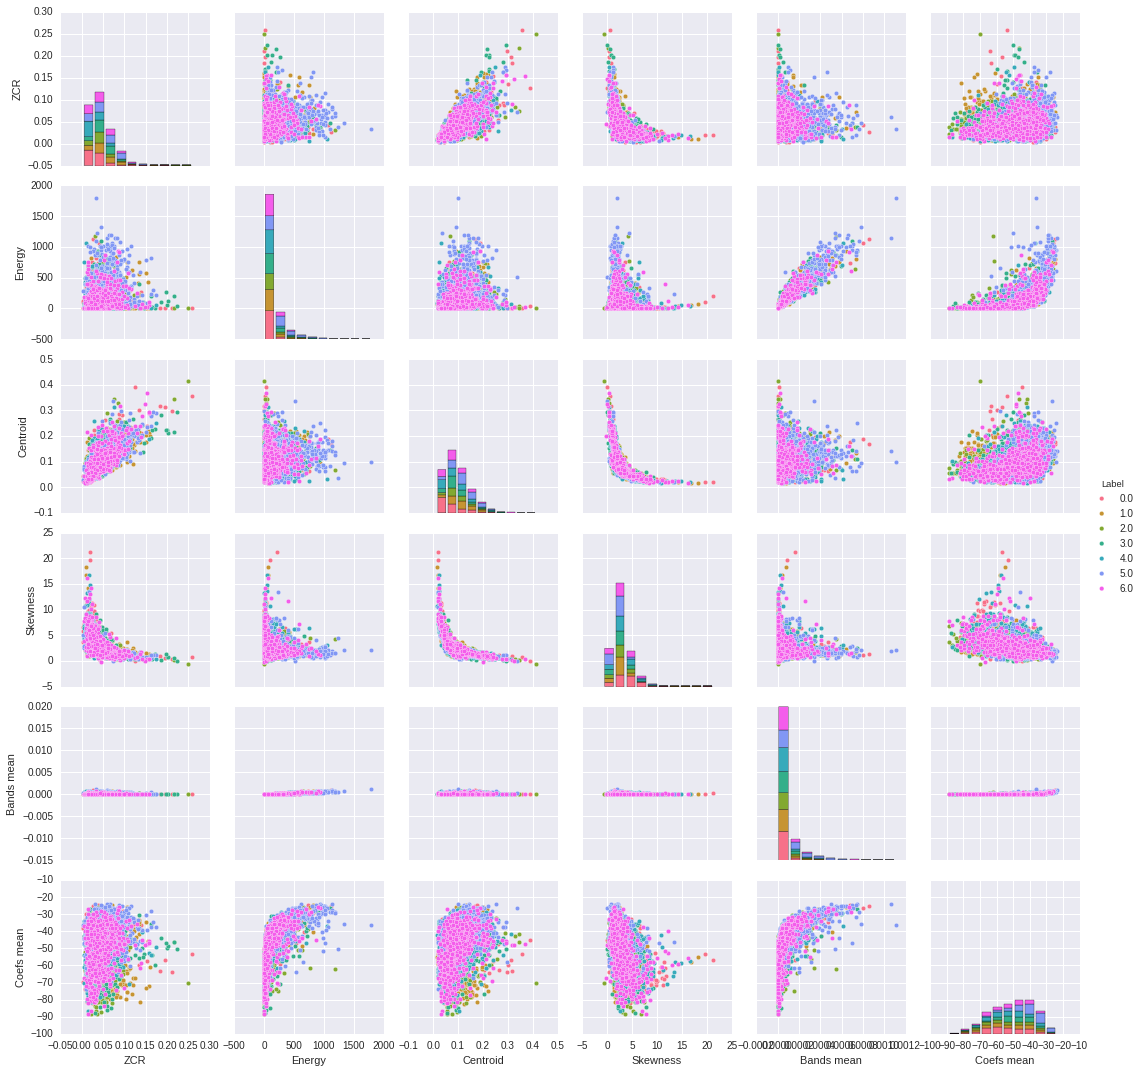

In [21]:
pairgrid = sns.pairplot(dataset, hue = 'Label', vars = ['ZCR', 'Energy', 'Centroid', 'Skewness', 'Bands mean', 'Coefs mean'])
pairgrid.savefig('pairplot.png')

In [22]:
with open('manyclasses.csv', 'w') as ftw:
    dataset.to_csv(ftw)